<a href="https://colab.research.google.com/github/nishant-harinkhede12/Machine-Learning-Projects/blob/main/pycaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


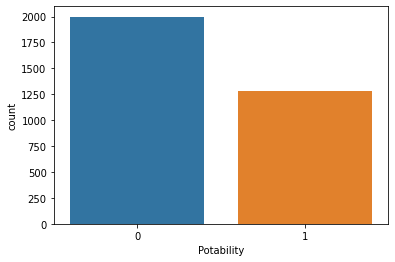

In [1]:
import pandas as pd
import numpy as na
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://raw.githubusercontent.com/amankharwal/Website-data/master/water_potability.csv'

data = pd.read_csv(url)
data.head()

data.isnull().sum()

data1 = data.dropna()

data1.isnull().sum()

# 491+781+162
# 1434 + 2011

sns.countplot(data.Potability)
# pip install plotly


In [3]:

import plotly.express as px
data = data
figure = px.histogram(data, x = "ph", 
                      color = "Potability", 
                      title= "Factors Affecting Water Quality: PH")
figure.show()

figure = px.histogram(data, x = "Hardness", 
                      color = "Potability", 
                      title= "Factors Affecting Water Quality: Hardness")
figure.show()

##############################################################
#below matrics suggest that there is no linear relationship in dataset
##############################################################
cor = data1.corr()

columns = cor[cor["Potability"]>0.7]["Potability"]
columns_1 = cor[cor["Potability"]<(-0.7)]["Potability"]

C = pd.concat([columns,columns_1],axis=1)
columns_list = C.index
columns_list

data2 = pd.DataFrame(data1,columns = columns_list)

##############################################################

x = data1.iloc[0:,0:9]
y = data1.iloc[0:,-1]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
sc.transform(X_test)


array([[-0.37409088,  1.36199702,  0.89433509, ..., -0.2213322 ,
         1.69388549,  0.68844662],
       [-0.52740076, -0.22969346,  0.66668847, ..., -0.30660543,
        -0.45461477, -0.3937937 ],
       [ 0.9220874 ,  0.66737318, -2.1435024 , ...,  0.19183733,
         1.01984903, -1.6794137 ],
       ...,
       [ 0.28898753, -0.29048799, -0.03131619, ...,  0.46711977,
        -1.11654454,  0.73209206],
       [-0.08712348,  0.23505309, -1.19033754, ..., -1.49521487,
        -0.67743783, -0.39504793],
       [-1.46042665, -1.36382761,  0.6632686 , ...,  0.60883183,
        -1.42114096, -1.40834359]])

In [3]:
###########################################################
# pycaret is library which will apply all classification algorithem
###########################################################
!pip install pycaret
from pycaret.classification import *
clf = setup(data1, target = "Potability", silent = True, session_id = 786)
compare_models()



,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.6830,0.7005,0.4197,0.6744,0.5133,0.2976,0.3182,0.717
qda,Quadratic Discriminant Analysis,0.6823,0.7192,0.3985,0.6883,0.5013,0.2917,0.3174,0.017
et,Extra Trees Classifier,0.6816,0.6941,0.3861,0.6858,0.4916,0.2863,0.3123,0.530
lightgbm,Light Gradient Boosting Machine,0.6652,0.6916,0.4762,0.6078,0.5324,0.2781,0.2840,0.122
gbc,Gradient Boosting Classifier,0.6602,0.6738,0.3718,0.6306,0.4667,0.2419,0.2603,0.358
nb,Naive Bayes,0.6184,0.6078,0.2478,0.5545,0.3412,0.1261,0.1462,0.018
dt,Decision Tree Classifier,0.6034,0.5895,0.5186,0.5049,0.5097,0.1775,0.1784,0.025
lr,Logistic Regression,0.5984,0.5199,0.0071,0.1900,0.0134,0.0028,0.0127,0.030
ridge,Ridge Classifier,0.5984,0.0000,0.0089,0.1583,0.0168,0.0035,0.0056,0.015
lda,Linear Discriminant Analysis,0.5977,0.4903,0.0089,0.1500,0.0167,0.0021,0.0024,0.019


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=786, verbose=0,
                       warm_start=False)

In [4]:
model = create_model("rf")
predict = predict_model(model, data=data1)
predict.head()

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7376,0.7545,0.4737,0.7941,0.5934,0.4174,0.4478
1,0.6525,0.6687,0.3860,0.6111,0.4731,0.2331,0.2468
2,0.6879,0.7056,0.4386,0.6757,0.5319,0.3134,0.3299
3,0.6738,0.7172,0.3684,0.6774,0.4773,0.2691,0.2955
4,0.6667,0.6885,0.3158,0.6923,0.4337,0.2417,0.2791
5,0.6312,0.6404,0.3929,0.5500,0.4583,0.1904,0.1966
6,0.7092,0.7192,0.5357,0.6667,0.5941,0.3717,0.3771
7,0.6786,0.6988,0.5000,0.6222,0.5545,0.3077,0.3122
8,0.7071,0.7090,0.3750,0.7778,0.5060,0.3322,0.3769
9,0.6857,0.7033,0.4107,0.6765,0.5111,0.2994,0.3196


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,Label,Score
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0,0,0.87
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0,0,0.91
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0,0,0.83
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0,0,0.89
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0,0,0.94
